In [47]:
%matplotlib inline
import warnings

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf

In [25]:
def stfunc_to_vorticity(psi, dx, dy):
    """
    stfunc = stream function
    
    Parameter:
    ---------
    psi: 2d-array, shape=(ny, nx)
        Stream Function.
    dx, dy: int or float
        The horizontal resolution.
    
    Return:
    ------
    Vorticity field.
    """
    ny, nx = psi.shape
    vorticity = np.zeros((nx, ny))
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            vorticity[j,i] = ( (psi[j,i+1] - 2*psi[j,i] + psi[j,i-1]) / dx**2   
                               + (psi[j+1,i] - 2*psi[j,i] + psi[j-1,i]) / dy**2 )
    vorticity[0,:] = vorticity[1,:]
    vorticity[-1,:] = vorticity[-2,:]
    vorticity[:,0] = vorticity[:,1]
    vorticity[:,-1] = vorticity[:,-2]
    return vorticity

In [45]:
def laplace_relaxation(Z_init, Y, dx, dy, alpha=0.5, epsilon=0.02, max_iter=500):
    """
    Given Y, solve Z which satisfy Laplacian(Z)=Y.
    The boundary of Z would be set to 0.
    """
    Z = Z_init
    ny, nx = Z.shape
    residual = np.zeros((ny, nx))
    
    n_iter = 0
    while True:
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                residual[j,i] = ( (Z[j,i+1] - 2*Z[j,i] + Z[j,i-1]) / dx**2
                                  + (Z[j+1,i] - 2*Z[j,i] + Z[j-1,i]) / dy**2 
                                  - Y[j,i] )
        dZ = (1+alpha) * residual / (2 * (1/dx**2 + 1/dy**2))
        Z += dZ
        n_iter += 1
        
        if np.all(np.abs(dZ) < epsilon):
            break
        elif n_iter >= max_iter:
            warnings.warn('The iteration has not converage.')
            break
            
    return Z

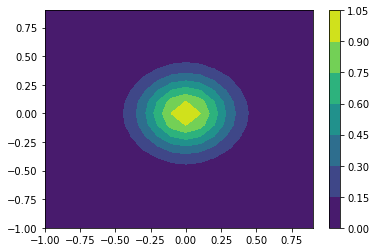

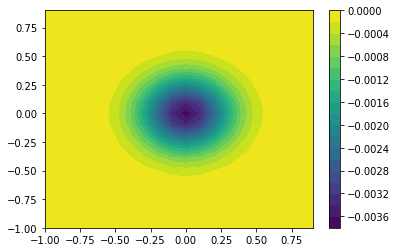

In [46]:
#http://ammar-hakim.org/sj/je/je1/je1-periodic-poisson.html
X, Y = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
s = np.exp(-10 * X**2 - 10 *Y**2)
plt.contourf(X, Y, s)
plt.colorbar()

plt.figure()
Z_init = np.zeros_like(X)
res = laplace_relaxation(Z_init, s, 0.1, 0.1)
plt.contourf(X, Y, res, levels=20)
plt.colorbar()

In [59]:
import wrf

f = netcdf.netcdf_file('../MY_WRF_test/wrfout_d01_2017-08-21_00_00_00')
lat = f.variables['XLAT'].data
lon = f.variables['XLONG'].data
f.variables.keys()

wrf.getvar(f, 'avo')

<xarray.DataArray 'avo' (bottom_top: 29, south_north: 66, west_east: 81)>
array([[[ 0.095045,  0.312881, ...,  1.429038,  1.072809],
        [ 0.047859,  0.531562, ...,  1.789513,  1.499402],
        ...,
        [ 8.624277,  8.537292, ...,  7.239637,  7.54183 ],
        [ 8.349417,  8.318874, ...,  9.044927,  9.25679 ]],

       [[ 0.021843,  0.290727, ...,  1.379476,  1.027457],
        [-0.048493,  0.454885, ...,  1.769359,  1.481609],
        ...,
        [ 8.505307,  8.662426, ...,  7.196579,  7.512532],
        [ 8.358203,  7.703104, ...,  9.049578,  9.288332]],

       ...,

       [[ 3.011521,  2.997144, ...,  2.320389,  2.40574 ],
        [ 3.190784,  3.187672, ...,  2.567078,  2.698341],
        ...,
        [ 6.738665,  6.615805, ...,  6.922763,  6.866424],
        [ 6.737563,  6.602931, ...,  6.969905,  6.963854]],

       [[ 3.277555,  3.289101, ...,  2.622591,  2.659787],
        [ 3.421454,  3.443614, ...,  2.99479 ,  3.033261],
        ...,
        [ 6.83292 ,  6.757597

In [72]:
[k for k in f.variables.keys() if k.startswith('F')]

['FNM', 'FNP', 'F']

Please wait for a moment
Iteration finished


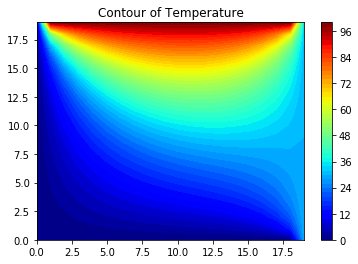

In [26]:
# Set maximum iteration
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 30

# Initial guess of interior grid
Tguess = 30

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteration (We assume that the iteration is convergence in maxIter = 500)
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")

# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()